In [ ]:
#### JBL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv("RFLFSODataFull.csv")

categorical_features = ['SYNOPCode', 'Time']
numerical_features = [col for col in data.columns if col not in categorical_features + ['FSO_Att', 'RFL_Att', 'Frequency']]

data = data.drop(columns=['Frequency'])

FSO_Y = data['FSO_Att']
FSO_X = data.drop(columns=['FSO_Att', 'RFL_Att'])
RFL_Y = data['RFL_Att']
RFL_X = data.drop(columns=['FSO_Att', 'RFL_Att'])


FSO_X_bigtrain, FSO_X_test, FSO_Y_bigtrain, FSO_Y_test = train_test_split(FSO_X, FSO_Y, test_size=0.2, random_state=42)
FSO_X_train, FSO_X_val, FSO_Y_train, FSO_Y_val = train_test_split(FSO_X_bigtrain, FSO_Y_bigtrain, test_size=0.2, random_state=42)


RF_X_bigtrain, RF_X_test, RF_Y_bigtrain, RF_Y_test = train_test_split(RFL_X, RFL_Y, test_size=0.2, random_state=42)
RF_X_train, RF_X_val, RF_Y_train, RF_Y_val = train_test_split(RF_X_bigtrain, RF_Y_bigtrain, test_size=0.2, random_state=42)

print(f"FSO Att : Training set shape: {FSO_X_train.shape}, {FSO_Y_train.shape}")
print(f"FSO Att : Validation set shape: {FSO_X_val.shape}, {FSO_Y_val.shape}")
print(f"FSO Att : Testing set shape: {FSO_X_test.shape}, {FSO_Y_test.shape}")
print(f"RF Att : Training set shape: {RF_X_train.shape}, {RF_Y_train.shape}")
print(f"RF Att : Validation set shape: {RF_X_val.shape}, {RF_Y_val.shape}")
print(f"RF Att : Testing set shape: {RF_X_test.shape}, {RF_Y_test.shape}")



FSO Att : Training set shape: (58482, 24), (58482,)
FSO Att : Validation set shape: (14621, 24), (14621,)
FSO Att : Testing set shape: (18276, 24), (18276,)
RF Att : Training set shape: (58482, 24), (58482,)
RF Att : Validation set shape: (14621, 24), (14621,)
RF Att : Testing set shape: (18276, 24), (18276,)


In [ ]:
FSO_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)


FSO_model.fit(FSO_X_train, FSO_Y_train)
RF_model.fit(RF_X_train, RF_Y_train)




RandomForestRegressor(random_state=42)

In [ ]:
# ppredictions & evaluation for FSO Att n RF
FSO_Y_train_Pred = FSO_model.predict(FSO_X_train)
FSO_Y_val_Pred = FSO_model.predict(FSO_X_val)

FSO_train_RMSE = np.sqrt(mean_squared_error(FSO_Y_train, FSO_Y_train_Pred))
FSO_val_RMSE = np.sqrt(mean_squared_error(FSO_Y_val, FSO_Y_val_Pred))
FSO_train_R2 = r2_score(FSO_Y_train, FSO_Y_train_Pred)
FSO_val_R2 = r2_score(FSO_Y_val, FSO_Y_val_Pred)

RF_Y_train_Pred = RF_model.predict(RF_X_train)
RF_Y_val_Pred = RF_model.predict(RF_X_val)

RF_train_RMSE = np.sqrt(mean_squared_error(RF_Y_train, RF_Y_train_Pred))
RF_val_RMSE = np.sqrt(mean_squared_error(RF_Y_val, RF_Y_val_Pred))
RF_train_R2 = r2_score(RF_Y_train, RF_Y_train_Pred)
RF_val_R2 = r2_score(RF_Y_val, RF_Y_val_Pred)

print(f'FSO Att - Training RMSE: {FSO_train_RMSE}, Training R2: {FSO_train_R2}')
print(f'FSO Att - Validation RMSE: {FSO_val_RMSE}, Validation R2: {FSO_val_R2}')

print(f'RF Att - Training RMSE: {RF_train_RMSE}, Training R2: {RF_train_R2}')
print(f'RF Att - Validation RMSE: {RF_val_RMSE}, Validation R2: {RF_val_R2}')



FSO Att - Training RMSE: 0.3257557954740462, Training R2: 0.9930433380243302
FSO Att - Validation RMSE: 0.8305635417939206, Validation R2: 0.9544274661125449
RF Att - Training RMSE: 0.24978953412089414, Training R2: 0.9947019602731251
RF Att - Validation RMSE: 0.7124247645429448, Validation R2: 0.9568287191504216


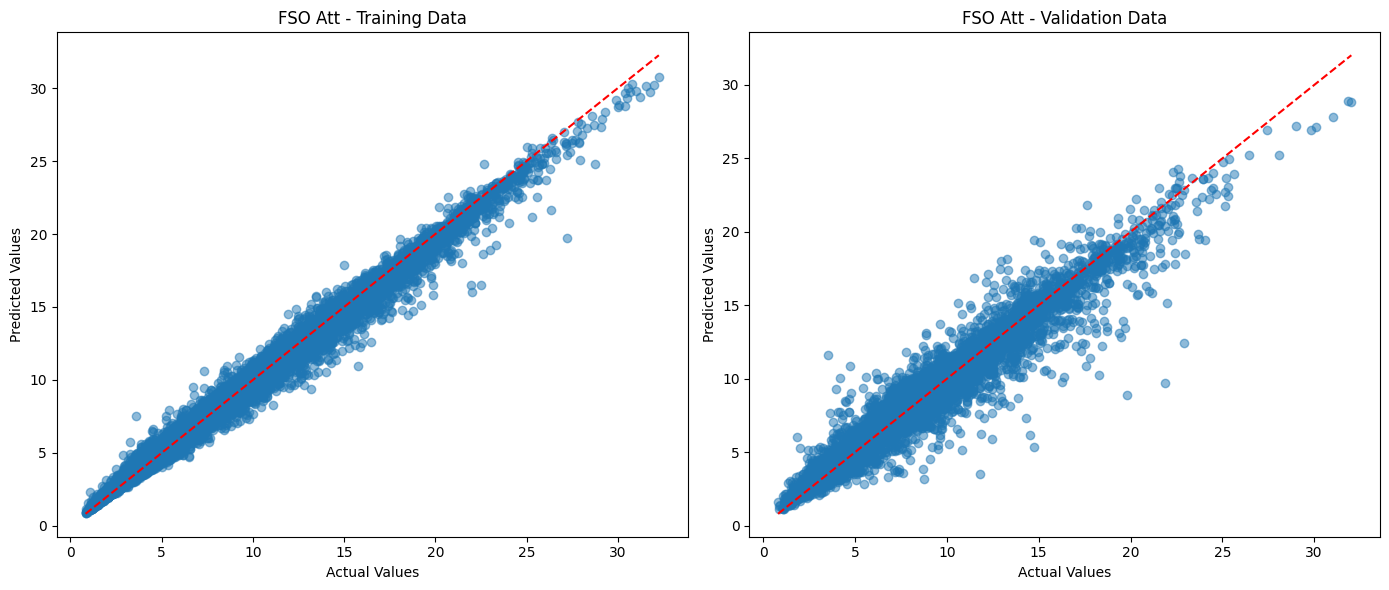

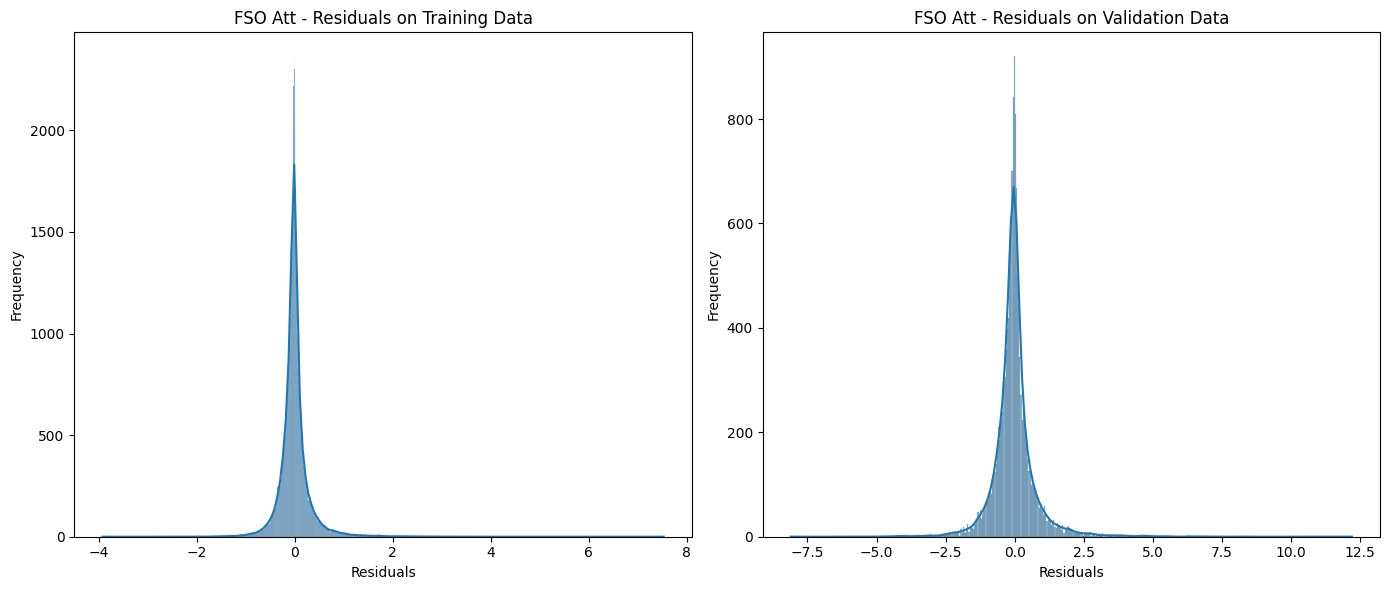

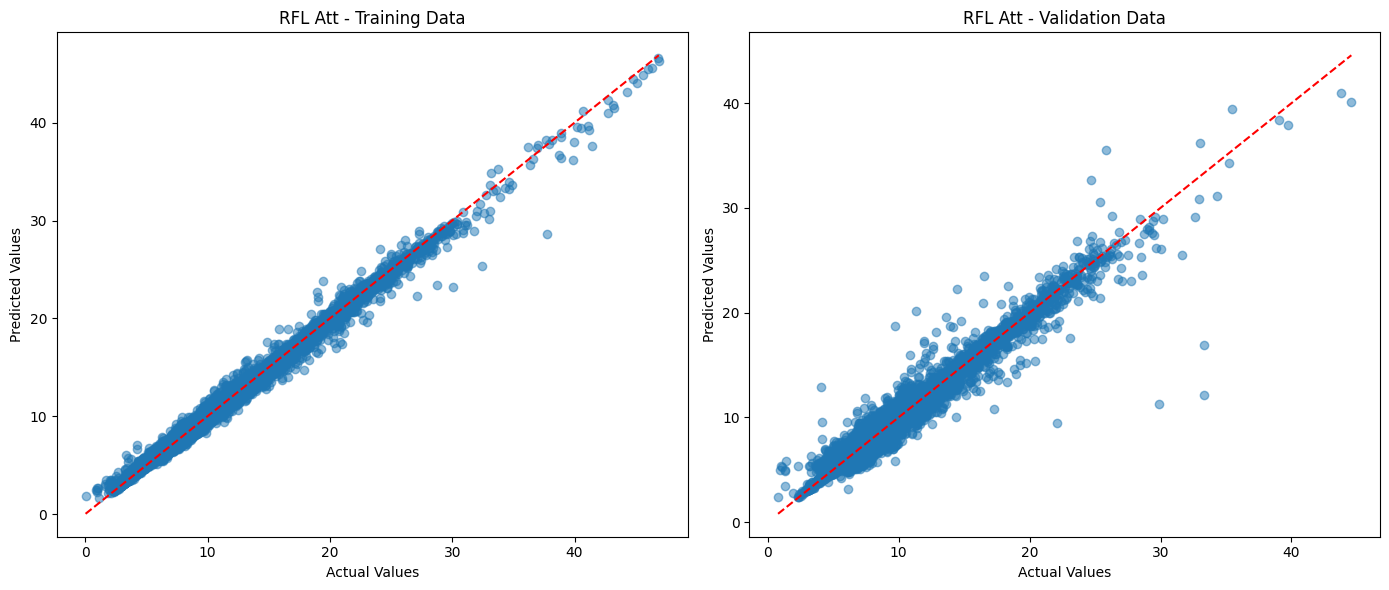

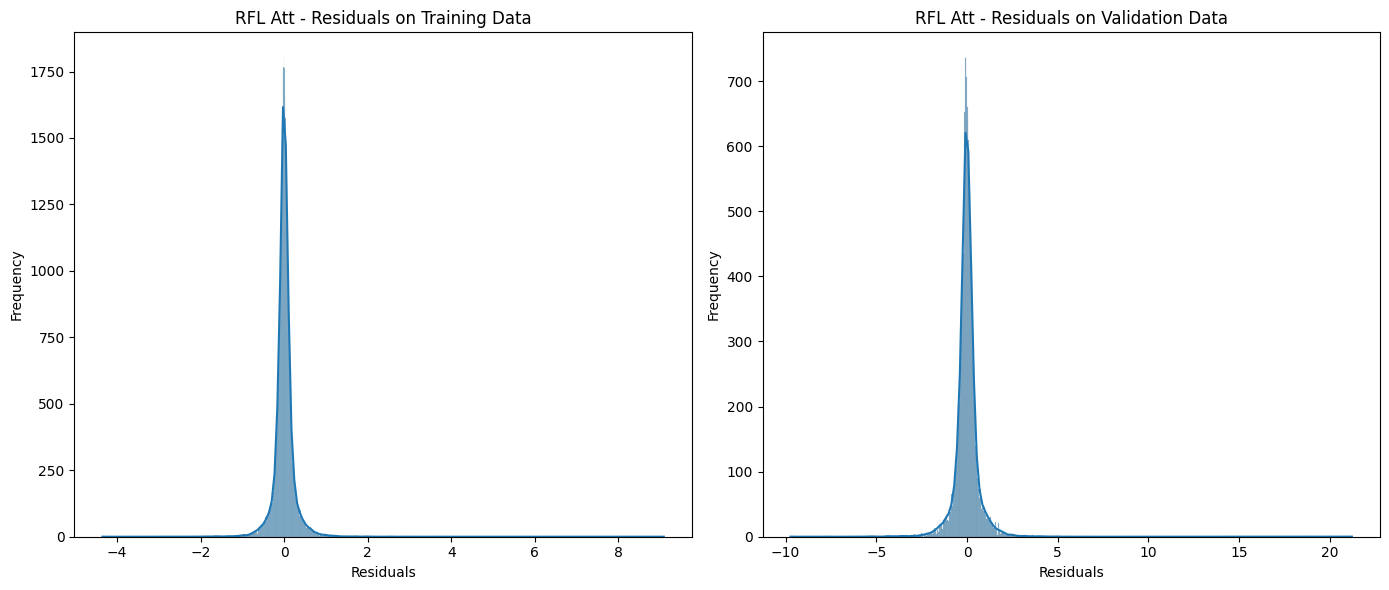

In [ ]:
def plot_actual_vs_predicted(Y_train, Y_train_Pred, Y_val, Y_val_Pred, title):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(Y_train, Y_train_Pred, alpha=0.5)
    plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='--')
    plt.title(f'{title} - Training Data')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.subplot(1, 2, 2)
    plt.scatter(Y_val, Y_val_Pred, alpha=0.5)
    plt.plot([min(Y_val), max(Y_val)], [min(Y_val), max(Y_val)], color='red', linestyle='--')
    plt.title(f'{title} - Validation Data')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

def plot_residuals(Y_train, Y_train_Pred, Y_val, Y_val_Pred, title):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    residuals_train = Y_train - Y_train_Pred
    sns.histplot(residuals_train, kde=True)
    plt.title(f'{title} - Residuals on Training Data')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    residuals_val = Y_val - Y_val_Pred
    sns.histplot(residuals_val, kde=True)
    plt.title(f'{title} - Residuals on Validation Data')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# aactual vs predicted values and residuals for FSO Att n RF Att
plot_actual_vs_predicted(FSO_Y_train, FSO_Y_train_Pred, FSO_Y_val, FSO_Y_val_Pred, 'FSO Att')
plot_residuals(FSO_Y_train, FSO_Y_train_Pred, FSO_Y_val, FSO_Y_val_Pred, 'FSO Att')

plot_actual_vs_predicted(RF_Y_train, RF_Y_train_Pred, RF_Y_val, RF_Y_val_Pred, 'RFL Att')
plot_residuals(RF_Y_train, RF_Y_train_Pred, RF_Y_val, RF_Y_val_Pred, 'RFL Att')

In [ ]:
# hyperparameter opyimisation

data = pd.read_csv("RFLFSODataFull.csv")
data = data.drop(columns=['Frequency'])

FSO_Y = data['FSO_Att']
FSO_X = data.drop(columns=['FSO_Att', 'RFL_Att'])
RFL_Y = data['RFL_Att']
RFL_X = data.drop(columns=['FSO_Att', 'RFL_Att'])

# FSO Att
FSO_X_bigtrain, FSO_X_test, FSO_Y_bigtrain, FSO_Y_test = train_test_split(FSO_X, FSO_Y, test_size=0.2, random_state=42)
FSO_X_train, FSO_X_val, FSO_Y_train, FSO_Y_val = train_test_split(FSO_X_bigtrain, FSO_Y_bigtrain, test_size=0.2, random_state=42)

# RF Att
RF_X_bigtrain, RF_X_test, RF_Y_bigtrain, RF_Y_test = train_test_split(RFL_X, RFL_Y, test_size=0.2, random_state=42)
RF_X_train, RF_X_val, RF_Y_train, RF_Y_val = train_test_split(RF_X_bigtrain, RF_Y_bigtrain, test_size=0.2, random_state=42)

parameter_grid = {
    'n_estimators': range(100,150,10),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

FSO_model = RandomForestRegressor(random_state=42, n_jobs=-1)
RF_model = RandomForestRegressor(random_state=42, n_jobs=-1)

FSO_grid_search = GridSearchCV(
    estimator=FSO_model, param_grid=parameter_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2
)
RF_grid_search = GridSearchCV(
    estimator=RF_model, param_grid=parameter_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2
)

FSO_grid_search.fit(FSO_X_train, FSO_Y_train)
RF_grid_search.fit(RF_X_train, RF_Y_train)

FSO_best_params = FSO_grid_search.best_params_
RF_best_params = RF_grid_search.best_params_

print("Best parameters for FSO Att are:", FSO_best_params)
print("Best parameters for RF Att are:", RF_best_params)

FSO_bestmodel = FSO_grid_search.best_estimator_
RF_bestmodel = RF_grid_search.best_estimator_


FSO_Y_train_Pred = FSO_bestmodel.predict(FSO_X_train)
FSO_Y_val_Pred = FSO_bestmodel.predict(FSO_X_val)
FSO_train_RMSE = np.sqrt(mean_squared_error(FSO_Y_train, FSO_Y_train_Pred))
FSO_val_RMSE = np.sqrt(mean_squared_error(FSO_Y_val, FSO_Y_val_Pred))
FSO_train_R2 = r2_score(FSO_Y_train, FSO_Y_train_Pred)
FSO_val_R2 = r2_score(FSO_Y_val, FSO_Y_val_Pred)

RF_Y_train_Pred = RF_bestmodel.predict(RF_X_train)
RF_Y_val_Pred = RF_bestmodel.predict(RF_X_val)
RF_train_RMSE = np.sqrt(mean_squared_error(RF_Y_train, RF_Y_train_Pred))
RF_val_RMSE = np.sqrt(mean_squared_error(RF_Y_val, RF_Y_val_Pred))
RF_train_R2 = r2_score(RF_Y_train, RF_Y_train_Pred)
RF_val_R2 = r2_score(RF_Y_val, RF_Y_val_Pred)

print(f'FSO Att - Training RMSE: {FSO_train_RMSE}, Training R2: {FSO_train_R2}')
print(f'FSO Att - Validation RMSE: {FSO_val_RMSE}, Validation R2: {FSO_val_R2}')

print(f'RF Att - Training RMSE: {RF_train_RMSE}, Training R2: {RF_train_R2}')
print(f'RF Att - Validation RMSE: {RF_val_RMSE}, Validation R2: {RF_val_R2}')


NameError: name 'pd' is not defined

In [ ]:
FSO_X_train_final = pd.concat([FSO_X_train, FSO_X_val], axis=0)
FSO_Y_train_final = pd.concat([FSO_Y_train, FSO_Y_val], axis=0)
FSO_bestmodel.fit(FSO_X_train_final, FSO_Y_train_final)
FSO_Y_test_final_pred = FSO_bestmodel.predict(FSO_X_test)

FSO_test_final_RMSE = np.sqrt(mean_squared_error(FSO_Y_test, FSO_Y_test_final_pred))
FSO_test_final_R2 = r2_score(FSO_Y_test, FSO_Y_test_final_pred)

RF_X_train_final = pd.concat([RF_X_train, RF_X_val], axis=0)
RF_Y_train_final = pd.concat([RF_Y_train, RF_Y_val], axis=0)
RF_bestmodel.fit(RF_X_train_final, RF_Y_train_final)
RF_Y_test_final_pred = RF_bestmodel.predict(RF_X_test)

RF_test_final_RMSE = np.sqrt(mean_squared_error(RF_Y_test, RF_Y_test_final_pred))
RF_test_final_R2 = r2_score(RF_Y_test, RF_Y_test_final_pred)

print(f'FSO Att - Final Test RMSE: {FSO_test_final_RMSE}, Final Test R2: {FSO_test_final_R2}')
print(f'RF Att - Final Test RMSE: {RF_test_final_RMSE}, Final Test R2: {RF_test_final_R2}')



NameError: name 'pd' is not defined

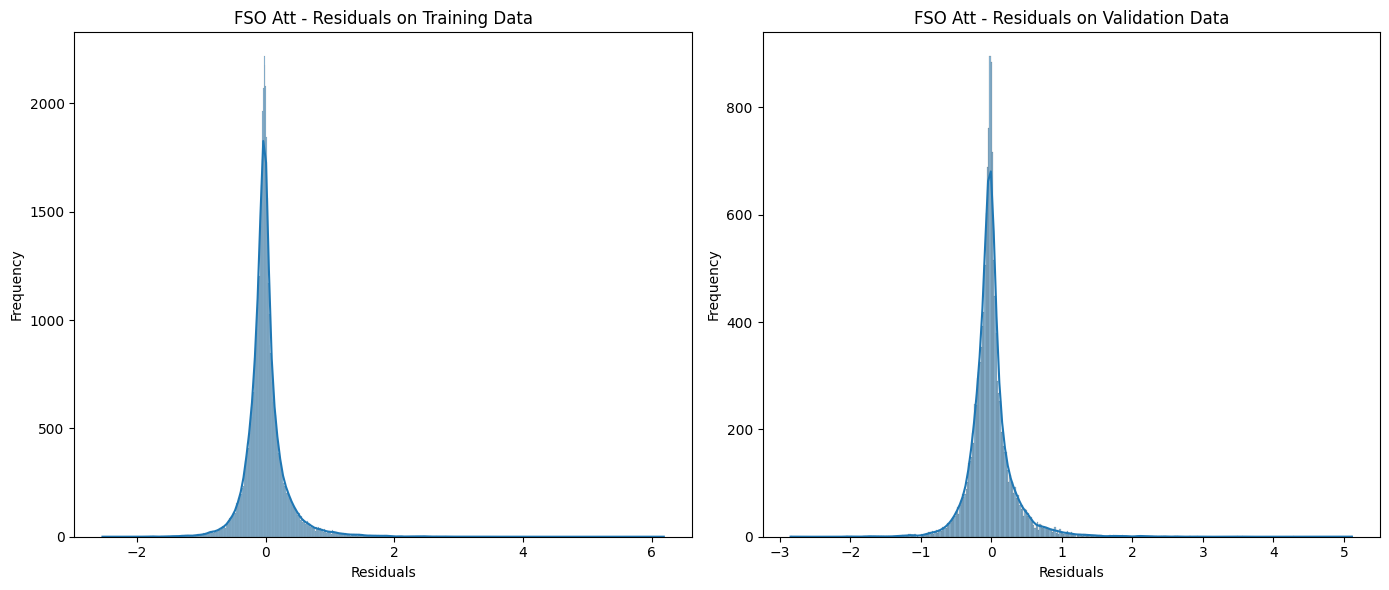

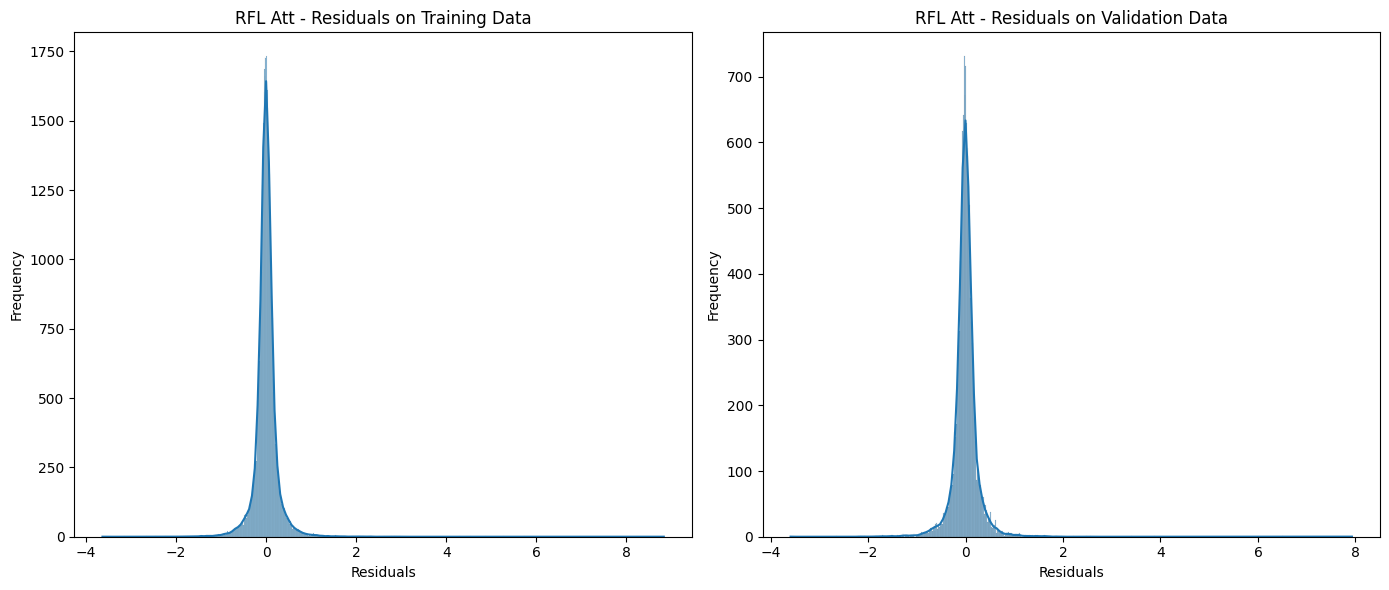

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuals(Y_train, Y_train_Pred, Y_val, Y_val_Pred, title):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    residuals_train = Y_train - Y_train_Pred
    sns.histplot(residuals_train, kde=True)
    plt.title(f'{title} - Residuals on Training Data')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    residuals_val = Y_val - Y_val_Pred
    sns.histplot(residuals_val, kde=True)
    plt.title(f'{title} - Residuals on Validation Data')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


FSO_Y_train_Pred = FSO_bestmodel.predict(FSO_X_train)
FSO_Y_val_Pred = FSO_bestmodel.predict(FSO_X_val)

RF_Y_train_Pred = RF_bestmodel.predict(RF_X_train)
RF_Y_val_Pred = RF_bestmodel.predict(RF_X_val)

plot_residuals(FSO_Y_train, FSO_Y_train_Pred, FSO_Y_val, FSO_Y_val_Pred, 'FSO Att')
plot_residuals(RF_Y_train, RF_Y_train_Pred, RF_Y_val, RF_Y_val_Pred, 'RFL Att')


# New Section